## Final Project Submission

Please fill out:
* Student name: Nyla Duperval
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:

Lights, Camera, ACTION! 

Since the 1890s, the film industry has provided a gateway to learning, communion and exploration. With the advancement of technology, the film industry has changed specifically the monetary input. A successful file requires a sucessful a team of writers, cinematographers, editors etc. To determine if Microsoft should enter the film industry, lets take a look at how much does it will cost to make a successful movie. Success will be determined by the comparison of production budget and gross(domestic & worldwide). 

In [206]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') 

Data Cleaning

First, I have cleaned the data within the dataframe imported. I created a column to specify only the year of a movie release for easier indexing. I also removed the column 'id' and 'release_date'. The dataset did not have any NaN values. I checked for duplicates which showed movies with similar or the same movie title but we're release different years. Within the movie industry, movie remakes are common and can have very large timeframes. 

In [208]:
tn_budgets.shape

(5782, 6)

In [209]:
tn_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [210]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
#Changed dtype for monetary sections

In [211]:
tn_budgets['release_date'] = tn_budgets['release_date'].str.replace(',', '')
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets['Year'] = tn_budgets['release_date'].dt.year
#Changed dtype and created new column

In [212]:
tn_budgets = tn_budgets.drop('id', axis=1)
tn_budgets = tn_budgets.drop('release_date',1)

In [213]:
tn_budgets.dtypes

movie                 object
production_budget      int32
domestic_gross         int32
worldwide_gross      float64
Year                   int64
dtype: object

In [227]:
pd.set_option('display.max_rows',10)
tn_budgets.sort_values('movie', inplace=True)
bool_series = tn_budgets['movie'].duplicated()
tn_budgets[bool_series]
#There were no dupicate movies however duplicate names. They may be remakes or movies created with same name but different plots

,movie,production_budget,domestic_gross,worldwide_gross,Year
4270,"20,000 Leagues Under the Sea",5000000,28200000,2.820000e+07,1954
5016,A Nightmare on Elm Street,1800000,25504513,2.550451e+07,1984
2032,Aladdin,28000000,217350219,5.040502e+08,1992
50,Alice in Wonderland,200000000,334191110,1.025491e+09,2010
340,Around the World in 80 Days,110000000,24004159,7.200416e+07,2004
...,...,...,...,...,...
2970,Trance,16000000,2322593,2.259405e+07,2013
2619,Twilight,20000000,15055091,1.505509e+07,1998
2838,Unforgettable,18000000,2483790,2.483790e+06,1996
4583,Unknown,3700000,26403,3.355048e+06,2006


In [228]:
tn_budgets.isna().sum()
#All columns show no NaN values 

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
Year                 0
dtype: int64

Text(0.5, 0, 'Production Budget')

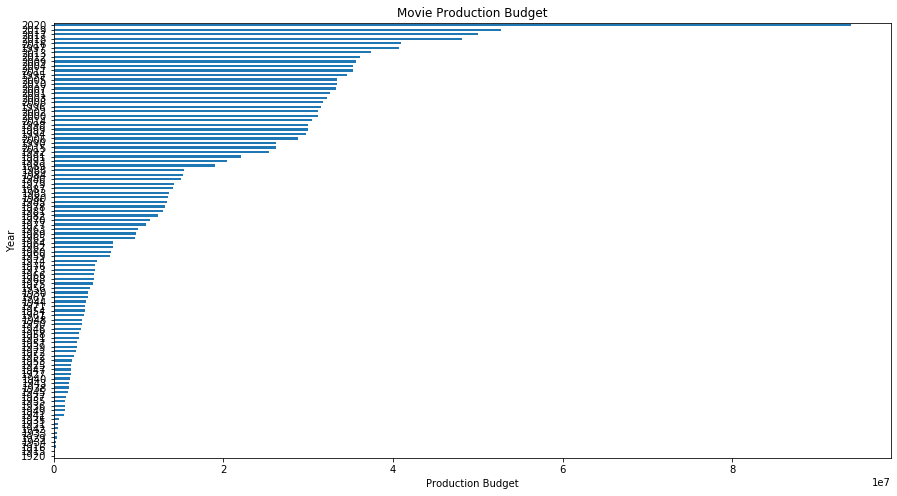

In [229]:
tn_budgets.groupby(['Year'])['production_budget'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Movie Production Budget')
plt.xlabel('Production Budget')
#From this graph we can see as time passes the average amount of production budgets also increase. Lets dig a little deeper!

Data Exploration 

I am taking a sample of 10% per each new datframe. there seems to be off by 181.

In [230]:
mark_gross = tn_budgets[(tn_budgets['domestic_gross'] > 0) & (tn_budgets['worldwide_gross'] > 0)].sort_values(by='Year')
mark_gross.shape
#I am choosing sample size of 358

(5234, 5)

In [231]:
dw_gross = mark_gross.sample(n=358, replace = False)
dw_gross.shape

(358, 5)

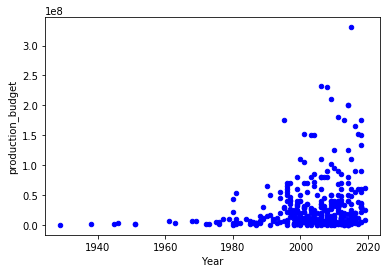

In [245]:
dw_gross.plot(kind='scatter', x='Year', y='production_budget', color='blue')
plt.show()

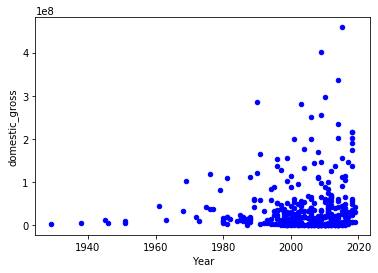

In [247]:
dw_gross.plot(kind='scatter', x='Year', y='domestic_gross',color='blue')

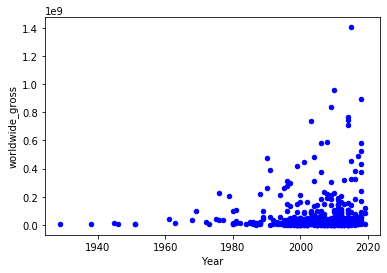

In [248]:
dw_gross.plot(kind='scatter', x='Year', y='worldwide_gross',color='blue')

In [246]:
dw_gross.groupby('Year')['production_budget'].mean()

Year
1929    3.790000e+05
1938    2.000000e+06
1945    1.250000e+06
1946    2.931000e+06
1951    1.500000e+06
            ...     
2015    5.670833e+07
2016    3.695455e+07
2017    4.433333e+07
2018    5.899333e+07
2019    3.150000e+07
Name: production_budget, Length: 54, dtype: float64

In [196]:
dw_gross.groupby('Year')['domestic_gross'].mean()

Year
1938    4.000000e+06
1946    2.040000e+07
1951    3.700000e+06
1954    1.500000e+07
1956    4.200000e+07
            ...     
2015    5.166386e+07
2016    3.824605e+07
2017    1.493773e+07
2018    1.319529e+08
2019    3.028981e+07
Name: domestic_gross, Length: 55, dtype: float64

In [197]:
dw_gross.groupby('Year')['worldwide_gross'].mean()

Year
1938    4.000000e+06
1946    2.040000e+07
1951    3.700000e+06
1954    1.500000e+07
1956    4.200000e+07
            ...     
2015    1.087057e+08
2016    1.323826e+08
2017    4.782899e+07
2018    2.965351e+08
2019    8.322939e+07
Name: worldwide_gross, Length: 55, dtype: float64

In [234]:
mark1_gross = tn_budgets[(tn_budgets['domestic_gross'] == 0) & (tn_budgets['worldwide_gross'] == 0 )].sort_values(by='Year')
mark1_gross.shape
#I am going to choose a sample size of 188

(367, 5)

In [236]:
zero_gross = mark1_gross.sample(n=188, replace = False, random_state = 188)
zero_gross.shape

(188, 5)

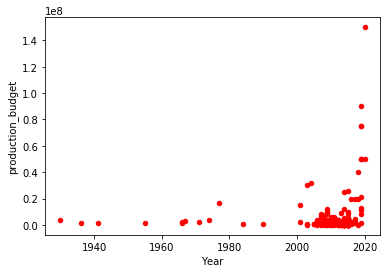

In [239]:
zero_gross.plot(kind='scatter', x='Year', y='production_budget', color='red')

In [237]:
zero_gross.groupby('Year')['production_budget'].mean()

Year
1930    4.000000e+06
1936    1.200000e+06
1941    1.250000e+06
1955    1.577000e+06
1966    1.688900e+06
            ...     
2016    5.320000e+06
2017    7.050000e+06
2018    1.993567e+07
2019    3.945500e+07
2020    1.000000e+08
Name: production_budget, Length: 30, dtype: float64

In [238]:
zero_gross.groupby('Year')['production_budget'].median()

Year
1930      4000000
1936      1200000
1941      1250000
1955      1577000
1966      1688900
          ...    
2016      2100000
2017      3500000
2018     19800000
2019     35400000
2020    100000000
Name: production_budget, Length: 30, dtype: int32